In [80]:
import pandas as pd 

In [81]:
customers = pd.read_csv(r'C:\Users\admin\Desktop\New folder (2)\Customers.csv')
products = pd.read_csv(r'C:\Users\admin\Desktop\New folder (2)\Products.csv')
transactions = pd.read_csv(r'C:\Users\admin\Desktop\New folder (2)\Transactions.csv')

In [82]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [83]:
customers.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [84]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [85]:
customers.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


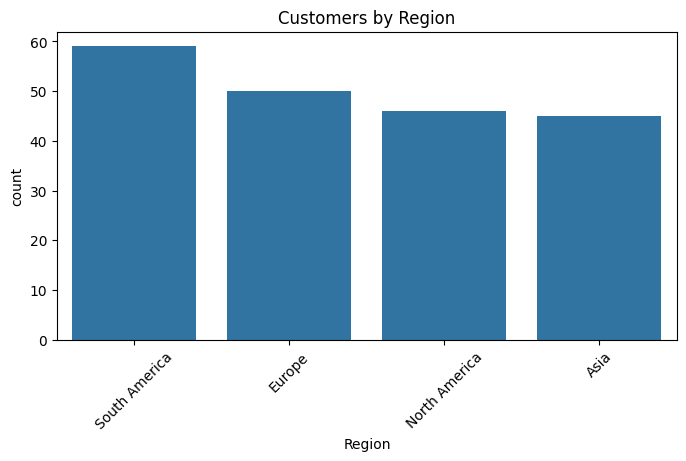

In [104]:
# Count of Customers by Region
plt.figure(figsize=(8, 4))
sns.countplot(x="Region", data=customers, order=customers["Region"].value_counts().index)
plt.title("Customers by Region")
plt.xticks(rotation=45)
plt.show()

In [86]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [87]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [88]:
products.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [89]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [90]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [91]:
transactions.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


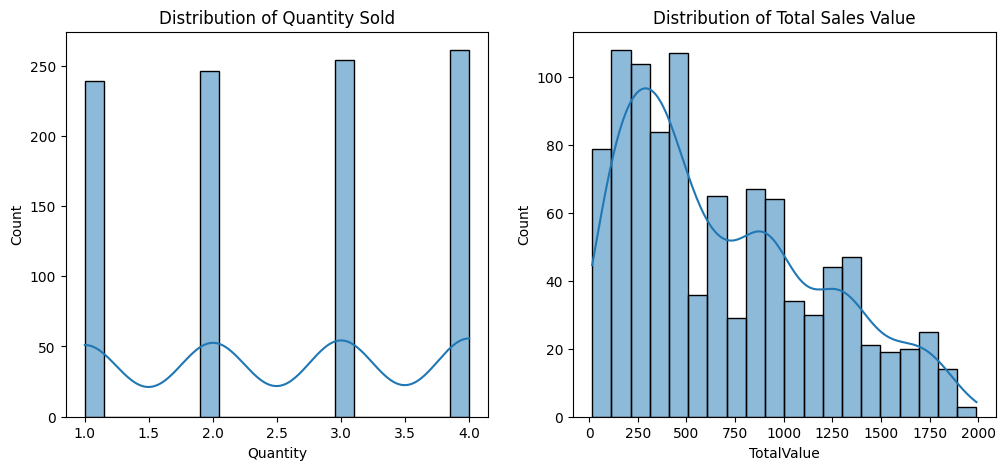

In [103]:
# Distribution of Quantity & TotalValue
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(transactions["Quantity"], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Quantity Sold")
sns.histplot(transactions["TotalValue"], bins=20, kde=True, ax=axes[1])
axes[1].set_title("Distribution of Total Sales Value")

plt.show()

In [92]:
# Merge transactions with customers
df = transactions.merge(customers, on="CustomerID", how="left")

In [93]:
customers.columns

Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')

In [94]:
products.columns

Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')

In [95]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15


In [96]:
# Merge the result with products
df1 = df.merge(products, on="ProductID", how="left")

In [97]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 109.4+ KB


In [98]:
df = df1.drop(columns=["Price_x"])  
df = df.rename(columns={"Price_y": "Price"}) 

In [99]:
df.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'CustomerName', 'Region', 'SignupDate',
       'ProductName', 'Category', 'Price'],
      dtype='object')

In [100]:
df.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Insight 1: Basic analysis by region and sales
# Sales Performance by Region

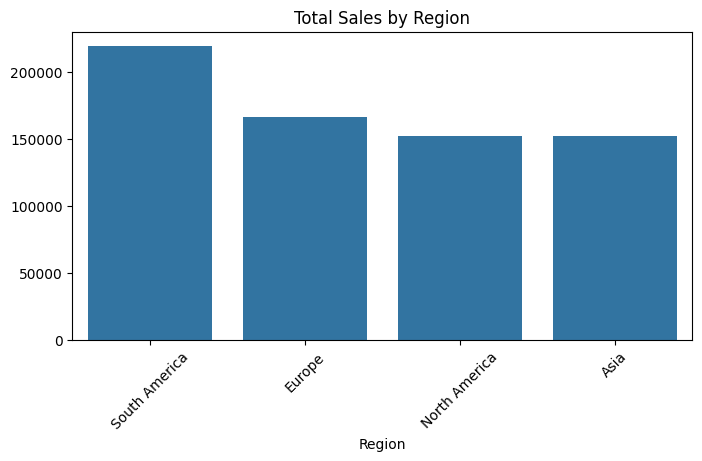

In [107]:
region_sales = df.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 4))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title("Total Sales by Region")
plt.xticks(rotation=45)
plt.show()

In [108]:
#Top Selling Products

In [122]:
top_products

ProductName
ActiveWear Smartwatch      39096.97
SoundWave Headphones       25211.64
SoundWave Novel            24507.90
ActiveWear Jacket          22712.56
ActiveWear Rug             22314.43
TechPro Headphones         19513.80
BookWorld Cookbook         19221.99
BookWorld Sweater          18743.79
TechPro Textbook           18267.96
ActiveWear Cookware Set    18083.73
Name: TotalValue, dtype: float64

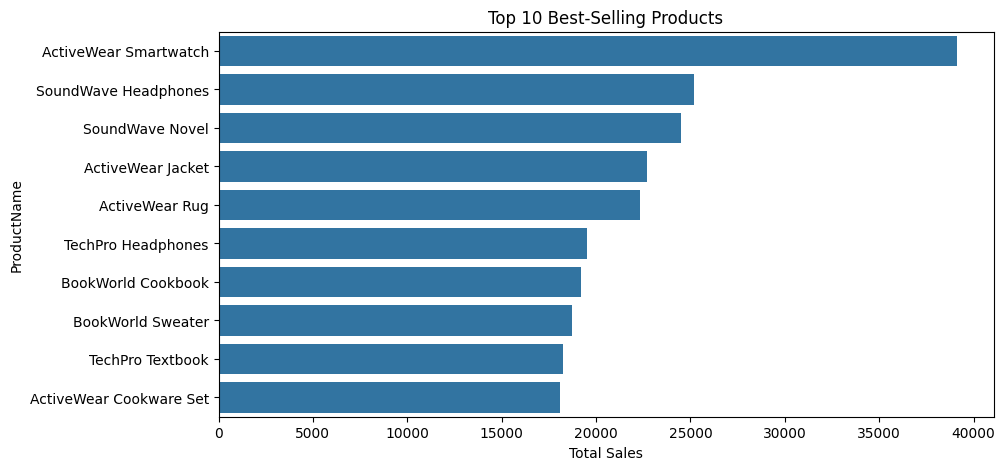

In [114]:
top_products = df.groupby("ProductName")["TotalValue"].sum().nlargest(10)
plt.figure(figsize=(10, 5))
sns.barplot(y=top_products.index, x=top_products.values)
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Total Sales")
plt.show()

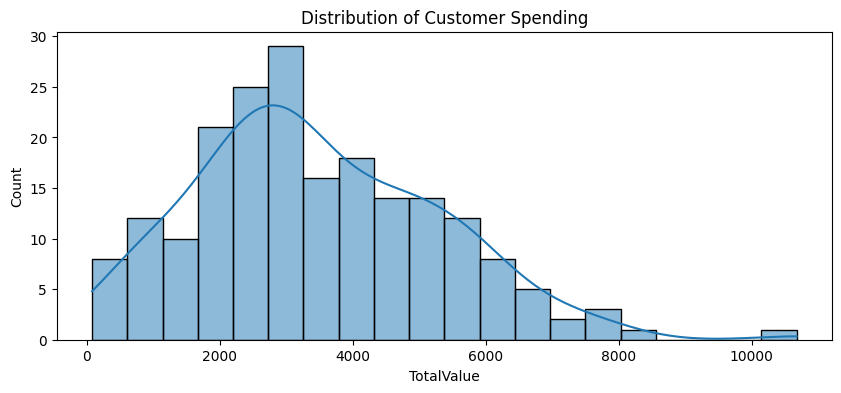

In [110]:
# Average spending per customer
customer_spending = df.groupby("CustomerID")["TotalValue"].sum()
plt.figure(figsize=(10, 4))
sns.histplot(customer_spending, bins=20, kde=True)
plt.title("Distribution of Customer Spending")
plt.show()

In [121]:
#Insight 2: Customer Signup & Purchase Trends:

In [120]:
# Merge the customers DataFrame with transactions on 'CustomerID'
transactions_with_signup = transactions.merge(customers[['CustomerID', 'SignupDate']], on='CustomerID', how='left')

# Convert 'TransactionDate' to datetime if it's not already
transactions_with_signup['TransactionDate'] = pd.to_datetime(transactions_with_signup['TransactionDate'])

# Calculate the number of months since signup
transactions_with_signup['MonthsSinceSignup'] = (transactions_with_signup['TransactionDate'] - transactions_with_signup['SignupDate']).dt.days // 30

# Filter early purchase customers (within 1 month of signup)
early_purchase_customers = transactions_with_signup[transactions_with_signup['MonthsSinceSignup'] <= 1]['CustomerID'].nunique()

# Get the total number of customers
total_customers = customers['CustomerID'].nunique()

# Output the results
print(f"Early purchase customers (within 1 month of signup): {early_purchase_customers}")
print(f"Total number of customers: {total_customers}")


Early purchase customers (within 1 month of signup): 80
Total number of customers: 200


In [115]:
#Insight 3: Top 5 customers by total spend
high_value_customers = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(5)

In [116]:
# High-value regions by total spend
transactions_with_regions = transactions.merge(customers[['CustomerID', 'Region']], on='CustomerID')
high_value_regions = transactions_with_regions.groupby('Region')['TotalValue'].sum().sort_values(ascending=False).head(5)

print(f"Top 5 high-value customers: {high_value_customers}")
print(f"Top 5 regions by total spend: {high_value_regions}")

Top 5 high-value customers: CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64
Top 5 regions by total spend: Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


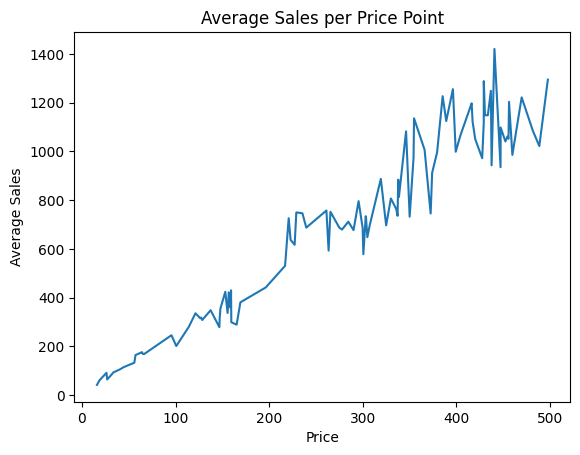

In [117]:
# Insight 4: Pricing & Discounts Impact on Sales
# Average sales per product at different prices
avg_sales_per_price = transactions.groupby('Price')['TotalValue'].mean()

# Plot Average Sales per Price
avg_sales_per_price.plot(kind='line', title="Average Sales per Price Point", xlabel='Price', ylabel='Average Sales')
plt.show()

In [118]:
# Insight 5: Repeat Purchase Behavior
# Number of repeat customers (customers with more than 1 transaction)
repeat_customers = transactions.groupby('CustomerID').size()
repeat_customers = repeat_customers[repeat_customers > 1]

# Total number of repeat customers
repeat_customer_count = repeat_customers.nunique()

print(f"Total number of repeat customers: {repeat_customer_count}")


Total number of repeat customers: 10
